# Tutorial rápido de Python para Matemáticos

&copy; Ricardo Miranda Martins, 2022 - http://www.ime.unicamp.br/~rmiranda/

## Índice

1. [Introdução](1-intro.html) 
2. [Python é uma boa calculadora!](2-calculadora.html) [(código fonte)](2-calculadora.ipynb)
3. [Resolvendo equações](3-resolvendo-eqs.html)  [(código fonte)](3-resolvendo-eqs.ipynb)
4. [Gráficos](4-graficos.html)  [(código fonte)](4-graficos.ipynb)
5. [Sistemas lineares e matrizes](5-lineares-e-matrizes.html)  [(código fonte)](5-lineares-e-matrizes.ipynb)
6. **[Limites, derivadas e integrais](6-limites-derivadas-integrais.html)** [(código fonte)](6-limites-derivadas-integrais.ipynb)
7. [Equações diferenciais](7-equacoes-diferenciais.html) [(código fonte)](7-equacoes-diferenciais.ipynb)



# Limites

Conhece aquela famosa piadinha? "Tudo tem limites, menos $1/x$ com $x\rightarrow 0$." Matemáticos tem um senso de humor bem peculiar.

O Python sabe muito bem trabalhar com limites, graças ao pacote SymPy. Não é nada recomendável calcular limites fazendo "tabelinhas" ou "aproximações", então o pacote de cálculo simbólico é o ideal.

Para calcular $$\lim_{x\rightarrow a} f(x)$$ o comando é ```sp.limit(f,x,a)```. A variável $x$ precisa anter ser definida.

In [86]:
import sympy as sp
x = sp.symbols('x')
sp.limit(x**2,x,2)

Bom, não vamos ficar usando o Python para calcular limites que sabemos calcular de cabeça, só substituindo os valores né? Vamos a alguns mais complicados. Por exemplo, que tal calcular $$\lim_{x\rightarrow 0} \dfrac{\sin(x)}{x}?$$

In [87]:
sp.limit(sp.sin(x)/x,x,0)

Isso significa que as funções $f(x)=\sin(x)$ e $g(x)=x$ são muito parecidas, para valores pequenos de $x$. Vamos fazer um gráfico para conferir isso:

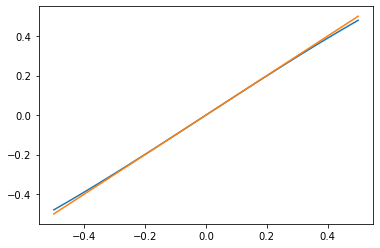

In [88]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-0.5, 0.5, 100)
y = np.sin(x)
plt.plot(x, y)
plt.plot(x, x)

E os limites que não existem? Também podem ser calculados!

In [89]:
import sympy as sp
x = sp.symbols('x')
sp.limit(1/(x-2),x,2)

Podemos calcular também limites com $x\rightarrow\infty$. No SymPy, o símbolo para infinito é ```oo```, lembrando do prefixo ```sp```. Sugestivo, não?

In [90]:
sp.limit(1/x,x,sp.oo)

Podemos ainda calcular limites laterais no Python, usando os símboos ```+``` ou ```-``` no comando.

In [91]:
sp.limit(1/x, x, 0, '+')

In [92]:
sp.limit(1/x, x, 0, '-')

Já vamos começar a falar sobre derivadas, mas podemos calculá-las pela definição, usando limites. Abaixo faremos um exemplo disso.

In [93]:
import sympy as sp
x, h = sp.symbols('x h', real=True)
f=x**2
fh=f.subs(x,x+h)
sp.limit( (fh-f)/h , h, 0)

O Python trabalha muito bem com funções definidas por partes. Abaixo fazemos um exemplo disso.

In [94]:
import sympy as sp
x = sp.symbols('x', real=True)
g=sp.Piecewise((x**2+1, x<1),(3*x, x>1))

In [95]:
sp.limit(g,x,1,'-')

In [96]:
sp.limit(g,x,1,'+')

Aviso importante: o Python não é muito bom com funções definidas por partes, tome cuidado com os resultados.

# Derivadas

Se você já fez um curso de cálculo, deve ter percebido que derivação é um processo extremamente mecânico. Não é difícil implementar um "derivador formal". O Python calcula derivadas de funções de uma ou mais variáveis de forma muito eficiente. Novamente vamos usar o SymPy.

Sem mais delongas vamos calcular a derivada de $f(x)=x^2+x$ com respeito à função $x$.

In [97]:
import sympy as sp
x = sp.symbols('x')
f=x**2+x
sp.diff(f,x)

Foi rápido, né? A função pode ser muito mais complicada, como por exemplo $g(x)=e^{x^3+x}+1/x$.

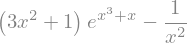

In [98]:
g=sp.exp(x**3+x)+1/x
sp.diff(g,x)

As funções podem ser de mais que uma variável:

In [99]:
y = sp.symbols('y')
h=sp.cos(x*y)+(3*x+y)/(y**2+1)

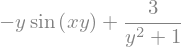

In [100]:
# derivada em x
sp.diff(h,x)

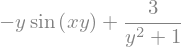

In [101]:
# derivada em y
sp.diff(h,x)

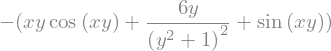

In [102]:
# derivada mista, em x depois em y
sp.diff(h,x,y)

Claro que as derivadas de ordem superior também podem ser pedidas de forma iterada:

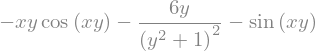

In [103]:
sp.diff(sp.diff(h,x),y)

Para derivadas de ordem superior, também é fácil. Abaixo calculamos a derivada de terceira ordem de $h(x,y)$ com respeito a $x$

In [104]:
sp.diff(h,x,x,x)

Se você quer a derivada em um ponto, pode usar o ```subs``` para avaliar a derivada nesse ponto:

In [105]:
sp.diff(h,x).subs(x,0).subs(y,0)

Claro que a função precisa estar definida no ponto, ou coisas podem dar errado..

In [106]:
sp.diff(g,x).subs(x,0).subs(y,0)

## Expansão em séries

Uma importante aplicação das derivadas é o cálculo da expansão em série de Taylor. O SymPy tem dois comandos para isso, o ```fps``` e o ```series```. Vamos testá-los com a função $f(x)=x\cos(x)$.

In [107]:
import sympy as sp
x = sp.symbols('x')
f=x*sp.cos(x)

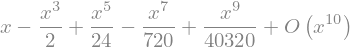

In [108]:
# calculando a expansao formal de f em serie de potencias
# com respeito aa variavel x, no ponto x=0, e truncando
# em ordem 10 usando o fps
fn=sp.fps(f,x,0).truncate(10)
display(fn)

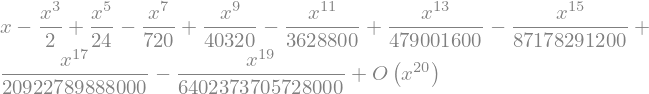

In [109]:
# o comando series tambem funciona: a sintaxe é 
# series(f(x),x,x0,k), onde x0 
fm=sp.series(f,x,0,20).as_expr()
display(fm)

Se você não está ligando o nome à pessoa, uma aplicação interessante das séries de potências de uma função é poder calcular aproximações de valores de uma função $f(x)$ que não permite cálculos "diretos".

Por exemplo, não sabemos calcular diretamente $e^2$, mas usando a série da exponencial, podemos aproximar esse valor tão bem quanto quisermos. Vamos usar o sufixo ```removeO``` para remover da série de Taylor a parte que tem os termos em $O(n)$.

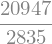

In [110]:
import sympy as sp
x = sp.symbols('x')
g = sp.exp(x)
gk = sp.series(g,x,0,10).removeO()
gk.subs(x,2)

Portanto, $20947/2835$ é uma boa aproximação racional para $e^2$. Bom, o que estamos fazendo é uma coisa totalmente sem propósito, já que estamos fazendo isso no computador e um simples comando poderia calcular. Mas é aquele famoso "toy problem". Só por curiosidade, note que:

In [111]:
20947//2835

Portanto, $e^2$ está perto de 7. Como bônus, se você decorar a série abaixo, poderá tirar aquela onda no churrasco do fim de ano e calcular aproximações para $e^x$ para valores de $x$ próximos de $0$. Certamente, vai ser um sucesso.

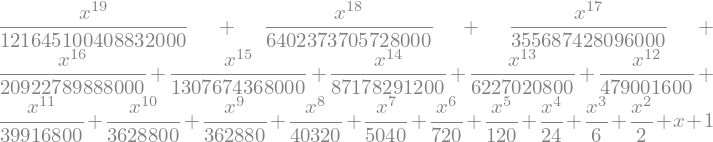

In [112]:
sp.series(g,x,0,20).as_expr().removeO()

# Integrais

E chegamos nas integrais. O integrador do SymPy é muito rápido e eficiente, e é o companheiro que gostaríamos de ter na hora da prova de cálculo. Resolver uma integral no Python é muito fácil: o comando é ```integrate(f,x)``` ou ```integrate(f,(x,a,b))``` se for uma integral definida, com $x\in[a,b]$.

In [113]:
import sympy as sp
x = sp.symbols('x')
f=x**2
sp.integrate(f,x)

In [114]:
import sympy as sp
x = sp.symbols('x')
g=x*sp.exp(x)
sp.integrate(g,x)

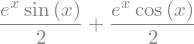

In [115]:
import sympy as sp
x = sp.symbols('x')
h=sp.exp(x)*sp.cos(x)
sp.integrate(h,x)

Bom, como você percebeu, o SymPy teria perdido $0.1$ em cada integral anterior - esqueceu a constante de integração.. coisa feia, Python. Alguns exemplos de integrais definidas:

In [116]:
p=x**3+x
sp.integrate(p,(x,0,1))

In [117]:
# vamos tentar enganar o python?
q=1/(x-2)
sp.integrate(q,(x,0,3))

Garoto esperto..

O Python também consegue calcular integrais impróprias, lembrando que o símbolo ```oo``` é usado para "infinito".

Atenção: se você tem menos que 18 anos, não execute o próximo comando!!

In [118]:
sp.integrate(sp.exp(-x**2), (x, 0, sp.oo))

Mais um exemplo de integral imprópria:

In [119]:
sp.integrate(1/(x**(6)), (x, 1,sp.oo))

A integração de funções de várias variávies, principalmente se o domínio for um retângulo, também pode ser feita sem problemas no Python:

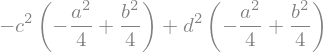

In [120]:
x, y, a, b, c, d = sp.symbols("x y a b c d")
f = x*y
sp.integrate(f, (y, a, b), (x, c, d))

Também podemos integrar sobre regiões um pouco mais gerais, as chamadas regiões de tipo I/tipo II, ou regiões $R_x$ ou $R_y$:

In [121]:
x, y, a, b, c, d = sp.symbols("x y a b c d")
f = x**2+y
sp.integrate(f, (y, 0, x+1), (x, 0, 1))

## Somas de Riemann

Na primeira aula de integrais, começamos com integrais definidas, fazendo umas figuras sobre somas de Riemann. Acredite em mim: é complicado fazer isso manualmente, pois os cálculos são complicados e os desenhos são chatos de fazer. Que tal usar o Python pra facilitar nossa vida? Facilitará tanto o trabalho do professor quanto do aluno, que entenderá melhor.

A implementação abaixo foi adaptada do Mathematical Python [(nesse site)](https://personal.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/).

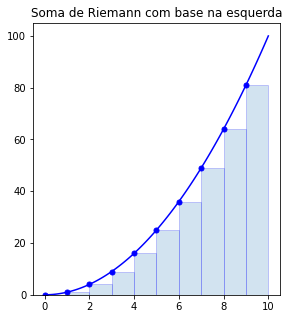

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# originamente, a função foi definida com a definicao lambda,
# que de fato é mais simples nesse caso - caso queira saber
# mais sobre ela, leia aqui:
# https://stackabuse.com/lambda-functions-in-python/
# f = lambda x : x**2

# definindo a função
def f(x):
    return x**2

# intervalo
a = 0; b = 10;

# numero de retangulos
N = 10

n = 10 # Use n*N+1 points to plot the function smoothly

# discretizando variáveis
x = np.linspace(a,b,N+1)
y = f(x)
X = np.linspace(a,b,n*N+1)
Y = f(X)

# iniciando plot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1]
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Soma de Riemann com base na esquerda'.format(N))

plt.show()